# Airport Taxi Demand Prediction Model

-----

## Overview

### Description

<div style="color: #196CC4;">
Sweet Lift Taxi aims to improve driver allocation during airport peak hours by accurately predicting taxi demand. Using historical order data, a time series forecasting model will be developed.
</div>

### Objective

<div style="color: #196CC4;">
Build a time series forecasting model capable of accurately predicting the number of taxi orders at airports during the next hour. This will enable us to anticipate demand and allocate resources more efficiently, thereby improving customer satisfaction and operational efficiency. Success will be measured by the model's ability to meet a specified error threshold in demand prediction.
</div>

### Resources

<div style="color: #196CC4;">
<b>Features</b><br>
▶ datetime - order timestamp<br>
▶ num_orders - number of orders<br>
</div>

### Methodology

<div style="color: #196CC4;">
<ol>
<li><strong>Initialization and Exploratory Data Analysis</strong>
<ul>
<li>Import libraries, modules, and a dataset: taxi.csv</li>
<li>Perform a general understanding of the dataset with preliminary correlations between date, time, and number of trips requested</li>
<li>Descriptive statistics</li>
<li>Perform an outlier analysis, observing outliers, mean, and considering +- 3 standard deviations</li>
<li>Resample the data in 1-hour intervals and verify that they are in chronological order</li>
<li>Since it is a time series and we are not combining multiple features, there is no need to scale the data</li>
<li>For feature engineering, consider Series such as year, month, day, day of the week to obtain additional information related to the seasonality of taxi requests</li>
<li>Visualization of the new DataFrame with the changes made and a graph to visualize the number of orders over time and its Moving Average. Also, zoom in to observe the behavior of the Moving Average in detail</li>
<li>Analysis of the resampled data to better understand the distribution of taxi orders over time with original data, trend, seasonality, and noise. A non-stationary trend is observed</li>

</ul>
</li>

<li><strong>Training</strong>
<ul>

<li>Divide the data into training and testing sets with a 9:1 ratio</li>
<li>Use Linear Regression, Random Forest, and LGBM with RMSE (Root Mean Squared Error) and prediction time to perform an analysis of the quality of the predictions</li></ul>
</li>

<li><strong>Model Evaluation</strong>
    <ul>
<li>Show a summary of the results and metrics obtained for each of the models used</li>
<li>Perform a quality analysis of the predictions </li>
<li>Perform an analysis of the prediction speed and training time of each model</li>

</ul>
</li>

<li><strong>Conclusions</strong>
    <ul>
<li>Select the best model in terms of performance accuracy</li>
    </ul>
</li>
</ol>

</div>

-----

## General Information

### Inicialization

In [1]:
# Data analysis
import pandas as pd

# Numerical operations
import numpy as np

# Math
import math

# Statistic Models
import statsmodels.api as sm

# Testing sets
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_squared_error
import time

# Time Series decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Statistical models & time series analysis methods
import statsmodels.api as sm

# Data visualization
import matplotlib.pyplot as plt

# Model training
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Gradient boosting model training
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [2]:
# Import data
taxis = pd.read_csv('datasets/taxi.csv', index_col=[0], parse_dates=[0])

### Dataset general overview


<div style="color: #196CC4;">
▶ Dataframes general properties
</div>

In [3]:
# General Dataframe properties
taxis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
# General data overview
display(taxis.head(3))

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28


<div style="color: #196CC4;">
▶ Descriptive statistics for numerical data.
</div>

In [5]:
# Descriptive statistics
taxis.describe(percentiles=np.arange(0,1,0.1))

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
0%,0.000000
10%,4.000000
20%,7.000000
30%,9.000000
40%,11.000000
50%,13.000000


### Initial Observations

<div style="color: #196CC4;">
▶ Series names are in lowercase<br>
▶ All Series will be essential for the project<br>
▶ There are no missing values<br>
▶ The Series "num_orders" is of type "object" but should be of type date<br>
▶ According to descriptive statistics, there are outliers in the Series "num_orders"
</div>

-----

## Exploratory Data Analysis (EDA)

### Outliers

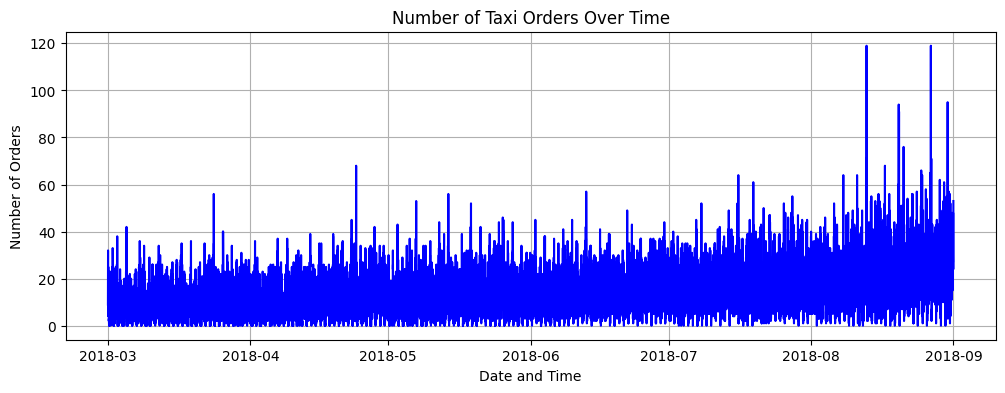

In [6]:
# Boxplot
plt.figure(figsize=(12, 4))
plt.plot(taxis['num_orders'], color='blue')
plt.title('Number of Taxi Orders Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

<div style="color: #196CC4;">
<b>Outliers</b><br>
▶ According to descriptive statistics, the "num_orders" values range from 0 to 119, with a mean of 14.07. Considering that the maximum value of 119 is quite far from the 75th percentile, it can be considered a potential outlier.<br>
▶ A box plot is shown below to visualize the data distribution for "num_orders".
</div>

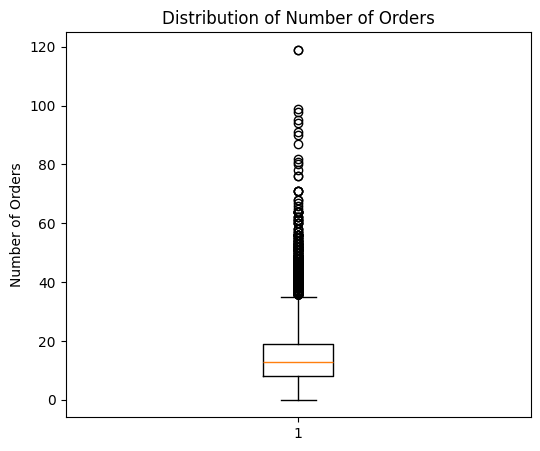

In [7]:
# Boxplot
plt.figure(figsize=(6, 5))
plt.boxplot(taxis['num_orders'])
plt.title('Distribution of Number of Orders')
plt.ylabel('Number of Orders')
plt.show()

<div style="color: #196CC4;">
<b>Mean and Standard Deviation</b><br>
▶ The specific values for the mean and standard deviation of "num_orders" are calculated below.
</div>

In [8]:
# Mean and the Standard Deviation
mean_num = taxis['num_orders'].mean()
std_num = taxis['num_orders'].std()

# Print
print("Mean of 'num_orders' column:", mean_num)
print("Standard deviation of 'num_orders' column:", std_num)

Mean of 'num_orders' column: 14.070463466183575
Standard deviation of 'num_orders' column: 9.211329545049038


<div style="color: #196CC4;">
▶ Based on these values, the limits for identifying outliers will be ±3 standard deviations from the mean.
</div>

In [9]:
# Limit Outliers
lower_bound_num = mean_num - 3 * std_num
upper_bound_num = mean_num + 3 * std_num

<div style="color: #196CC4;">
▶ These limits will be used to identify and remove outliers.
</div>

In [10]:
# Delete Outliers
taxis = taxis[(taxis['num_orders'] >= lower_bound_num) & (taxis['num_orders'] <= upper_bound_num)]

<div style="color: #196CC4;">
▶ Checking descriptive statistics
</div>

In [11]:
# Descriptive statistics
taxis.describe(percentiles=np.arange(0,1,0.1))

,num_orders
count,26179.000000
mean,13.630314
std,8.251699
min,0.000000
0%,0.000000
10%,4.000000
20%,6.000000
30%,9.000000
40%,11.000000
50%,12.000000


<div style="color: #196CC4;">
▶ Display of data after removing outliers
</div>

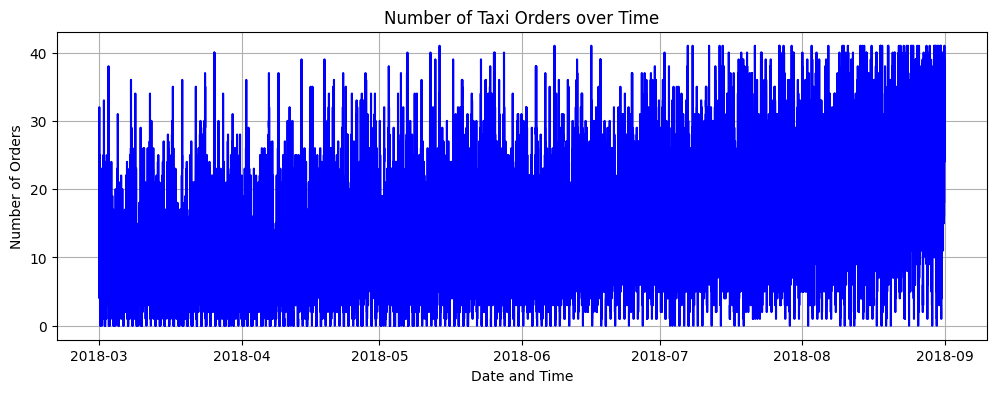

In [12]:
# Plot
plt.figure(figsize=(12, 4))
plt.plot(taxis['num_orders'], color='blue')
plt.title('Number of Taxi Orders over Time')
plt.xlabel('Date and Time')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

### Data resampling

<div style="color: #196CC4;">
▶ Next, the 'taxis' DataFrame is sorted by its index. The data in the 'taxis' DataFrame is resampled to 1-hour intervals ('1H'), summing the values within each interval. Finally, it is verified that the dates and times are in chronological order using 'is_monotonic'.
</div>

In [13]:
taxis.sort_index(inplace=True)
taxis = taxis.resample('1H').sum()

# Is monotonic increasing?
print(taxis.index.is_monotonic_increasing)

True


C:\Users\dguez\AppData\Local\Temp\ipykernel_13756\3355078505.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  taxis = taxis.resample('1H').sum()


### Data scaling

<div style="color: #196CC4;">
▶ In the case of a single time series, without the combination of multiple features with different scales, data scaling is not required.</div>

In [14]:
# Print
taxis

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


In [15]:
# Dataframe copy for time series models
taxis_default = taxis.copy()

### Feature Engineering

<div style="color: #196CC4;">
▶ It's advisable to include basic features such as year, month, day, and day of the week in your dataset for time series analysis. These features can provide additional information about seasonal, monthly, or daily variations in the number of taxi orders.<br>
▶ Adding lag features can capture temporal dependencies between past and present values of the time series.<br>
▶ Considering a Moving Average can also be beneficial as it can smooth short-term fluctuations and highlight long-term trends.
</div>

In [16]:
def make_features(data, max_lag, rolling_mean_size):
    
    # New time features
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek

    # Delay
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    # Moving Average
    data['rolling_mean'] = (data['num_orders'].shift().rolling(rolling_mean_size).mean())

In [17]:
# New features function
make_features(taxis, 6, 20)

### Display of Information

<div style="color: #196CC4;">
▶ I will now proceed to inspect the modifications made to the properties of the 'taxis' DataFrame and visualize a sample of the data.<br>
</div>

In [18]:
taxis

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,2018,8,31,4,165.0,173.0,197.0,116.0,133.0,166.0,123.15
2018-08-31 20:00:00,154,2018,8,31,4,136.0,165.0,173.0,197.0,116.0,133.0,122.20
2018-08-31 21:00:00,159,2018,8,31,4,154.0,136.0,165.0,173.0,197.0,116.0,126.20


<div style="color: #196CC4;">
▶ The complete graph with its moving average is shown below.<br>
</div>

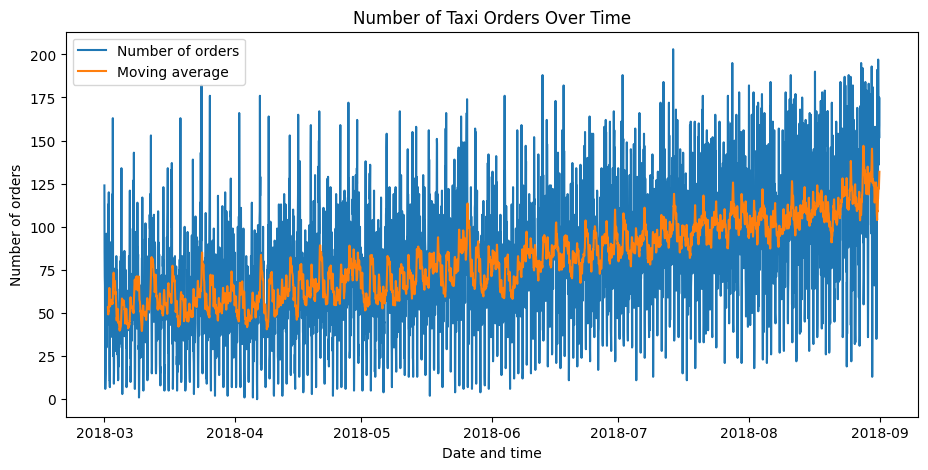

In [19]:
# Selected series
series_1 = taxis['num_orders']
series_2 = taxis['rolling_mean']

# Graph
plt.figure(figsize=(11, 5))
plt.plot(series_1, label='Number of orders')
plt.plot(series_2, label='Moving average')

# Labels
plt.xlabel('Date and time')
plt.ylabel('Number of orders')
plt.title('Number of Taxi Orders Over Time')
plt.legend()

# Print
plt.show()

<div style="color: #196CC4;">
▶ A zoomed-in view of the graph is shown below to better visualize the pattern followed by the moving average.<br>
</div>

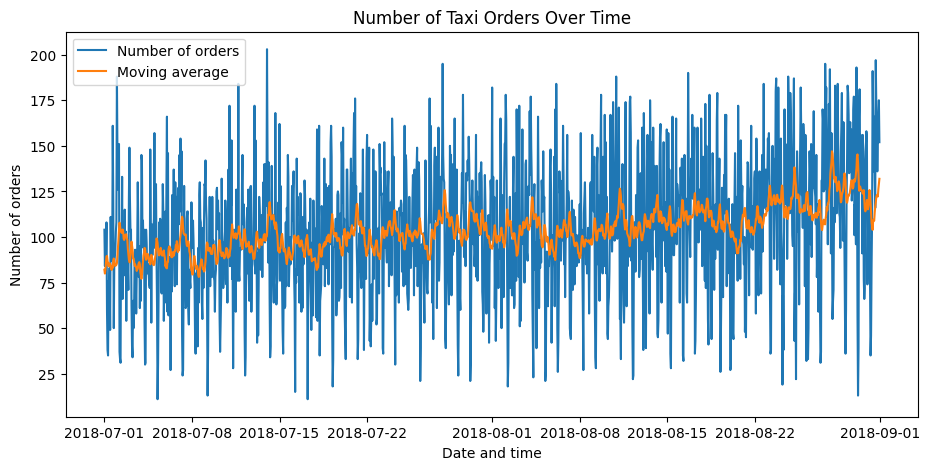

In [20]:
# Selected series
series_1 = taxis['2018-07-01':'2018-09-30']['num_orders']
series_2 = taxis['2018-07-01':'2018-09-30']['rolling_mean']

# Graph
plt.figure(figsize=(11, 5))
plt.plot(series_1, label='Number of orders')
plt.plot(series_2, label='Moving average')

# Labels
plt.xlabel('Date and time')
plt.ylabel('Number of orders')
plt.title('Number of Taxi Orders Over Time')
plt.legend()

# Print
plt.show()

<div style="color: #196CC4;">
▶ Next, we'll verify the properties and overview of the data ready for training.
</div>

In [21]:
# Data displayment
taxis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4416 non-null   int64  
 1   year          4416 non-null   int32  
 2   month         4416 non-null   int32  
 3   day           4416 non-null   int32  
 4   dayofweek     4416 non-null   int32  
 5   lag_1         4415 non-null   float64
 6   lag_2         4414 non-null   float64
 7   lag_3         4413 non-null   float64
 8   lag_4         4412 non-null   float64
 9   lag_5         4411 non-null   float64
 10  lag_6         4410 non-null   float64
 11  rolling_mean  4396 non-null   float64
dtypes: float64(7), int32(4), int64(1)
memory usage: 508.5 KB


In [22]:
# Data displayment
display(taxis.head(25))

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN
2018-03-01 05:00:00,6,2018,3,1,3,43.0,66.0,71.0,85.0,124.0,NaN,NaN
2018-03-01 06:00:00,12,2018,3,1,3,6.0,43.0,66.0,71.0,85.0,124.0,NaN
2018-03-01 07:00:00,15,2018,3,1,3,12.0,6.0,43.0,66.0,71.0,85.0,NaN
2018-03-01 08:00:00,34,2018,3,1,3,15.0,12.0,6.0,43.0,66.0,71.0,NaN


### Analysis of resampled datasets

<div style="color: #196CC4;">
▶ Next, we'll perform an exploratory data analysis on the resampled data to better understand the distribution of taxi orders over time.

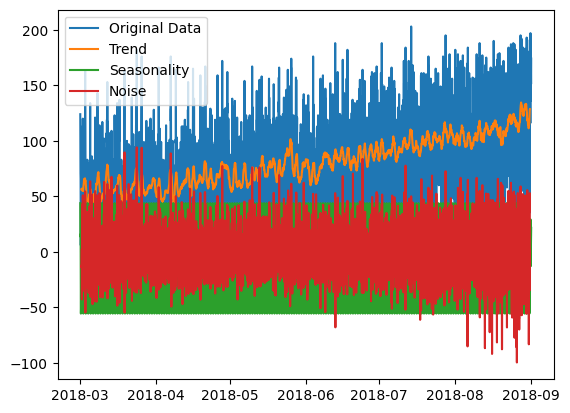

In [23]:
# Decomposition
decomposition = sm.tsa.seasonal_decompose(
    taxis['num_orders'], model='additive')

# Trend extraction
trend = decomposition.trend

# Seasonality extraction
seasonality = decomposition.seasonal

# Noise extraction
noise = decomposition.resid

# Plots
# Changed label to "Original Data"
plt.plot(taxis['num_orders'], label='Original Data')
plt.plot(trend, label='Trend')
plt.plot(seasonality, label='Seasonality')
plt.plot(noise, label='Noise')
plt.legend()

# Print
plt.show()

<div style="color: #196CC4;">
▶ A seasonal decomposition of the time series is presented below.
</div>


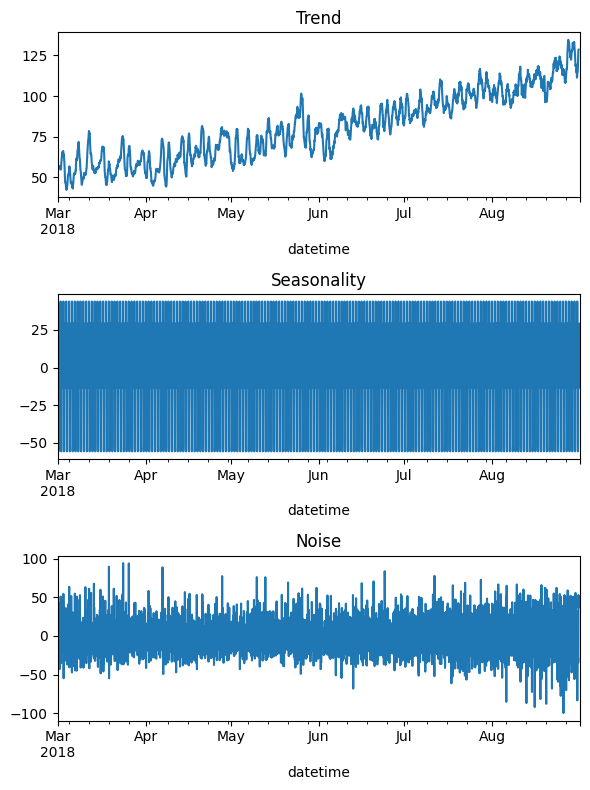

In [24]:
# Decompose
decomposed = seasonal_decompose(taxis['num_orders'])

# Plot size
plt.figure(figsize=(6, 8))

# Trend
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

# Seasonality
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

# Residuals
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Noise') 

plt.tight_layout()

<div style="color: #196CC4;">
<b>Analysis</b><br>
▶ The preceding graphs reveal a non-stationary trend, indicated by a consistent upward movement over time. This suggests a continuous increase in taxi demand. <br>
▶ The seasonality exhibits repetitive and consistent patterns over time, implying that the stability of the underlying factors contributes to the apparent lack of change in these seasonal cycles.
</div>

-----

## Training

### Data Splitting

<div style="color: #196CC4;">
<b>The data is divided as follows to achieve a 6:2:2 ratio</b><br>
▶ 60% Training dataset<br>
▶ 20% Validation dataset<br>
▶ 20% Test dataset<br><br>
The larger the training set, the more data the model will have to learn patterns and relationships in the data. On the other hand, the validation dataset will be used to evaluate the model's performance, and the test dataset will be reserved for the final performance evaluation of the model (when the training and validation processes are complete).
</div>


In [25]:
# Split the data into a training set (60%), a test set (20%) and validation set (20%)
df_train, df_temp = train_test_split(taxis, shuffle=False, test_size=0.4)
df_test, df_valid = train_test_split(df_temp, shuffle=False, test_size=0.5)

# Drop rows with missing values from training set
df_train = df_train.dropna()

In [26]:
min_size = min(len(df_valid), len(df_test))
df_valid = df_valid.sample(n=min_size, random_state=42)
df_test = df_test.sample(n=min_size, random_state=42)

<div style="color: #196CC4;">
▶ In these lines of code, the data is being prepared for training, validation and testing a machine learning model. A separation is performed between the features and the target variable in each dataset.
</div>

In [27]:
# Extract features and target variables from the training, test and validation sets
features_train = df_train.drop(['num_orders'], axis=1)
target_train = df_train['num_orders']

features_valid = df_valid.drop(['num_orders'], axis=1)
target_valid = df_valid['num_orders']

features_test = df_test.drop(['num_orders'], axis=1)
target_test = df_test['num_orders']

In [28]:
print("Size of features_train", len(features_train))
print("Size of target_train:", len(target_train))
print("Size of features_valid:", len(features_valid))
print("Size of target_valid:", len(target_valid))
print("Size of features_test:", len(features_test))
print("Size of target_test:", len(target_test))

Size of features_train 2629
Size of target_train: 2629
Size of features_valid: 883
Size of target_valid: 883
Size of features_test: 883
Size of target_test: 883


### Linear Regression

<div style="color: #196CC4;">
▶ Linear regression is a model that assumes a linear relationship between an object's features and its value. It seeks to find the best-fitting straight line to the data in order to make predictions.
</div>

In [29]:
# Model
linear_reg = LinearRegression()

# Train
rlineal_start_train_time = time.time()
linear_reg.fit(features_train, target_train)

# Training time
rlineal_end_train_time = time.time()
rlineal_train_time = rlineal_end_train_time - rlineal_start_train_time

# Price prediction
rlineal_start_pred_time = time.time()
linear_reg_pred_train = linear_reg.predict(features_train)
linear_reg_pred_test = linear_reg.predict(features_valid)

# Predictions time
rlineal_end_pred_time = time.time()
rlineal_pred_time = rlineal_end_pred_time - rlineal_start_pred_time

In [30]:
# Quality of trainning metrics
rlineal_train_mse = mean_squared_error(target_train, linear_reg_pred_train)
rlineal_train_rmse = rlineal_train_mse ** 0.5

# Quality of prediction metrics
rlineal_pred_mse = mean_squared_error(target_test, linear_reg_pred_test)
rlineal_pred_rmse = rlineal_pred_mse ** 0.5

# Print LinealRegression
print("Linear Regression Model")
print()

# Print metrics
print("Root Mean Squared Error (RMSE):", rlineal_pred_rmse)

# Print time
print("Prediction Time:", rlineal_pred_time, "seconds")

Linear Regression Model

Root Mean Squared Error (RMSE): 39.006888531251484
Prediction Time: 0.0030012130737304688 seconds


### Random Forest

<div style="color: #196CC4;">
▶ Random Forest is an ensemble method that consists of many decision trees. Each tree is trained on a different subset of the data, and their outputs are combined to produce a more accurate and robust prediction.
</div>

In [31]:
# Parameters
param_dist_forest = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 4, 6]
}

# Randomized search & cross-validation
random_search_forest = RandomizedSearchCV(RandomForestRegressor(
    random_state=12345), param_dist_forest, scoring='neg_mean_squared_error', cv=2, n_iter=10)

# Training
forest_start_train_time = time.time()
random_search_forest.fit(features_train, target_train)

# Training time
forest_end_train_time = time.time()
forest_train_time = forest_end_train_time - forest_start_train_time

# Best model
best_model_forest = random_search_forest.best_estimator_

# Print best model parameters
print("Best model parameters:")
print(best_model_forest.get_params())

# Predictions
forest_start_pred_time = time.time()
predicted_train_forest_random = best_model_forest.predict(features_train)
predicted_test_forest_random = best_model_forest.predict(features_valid)

# Predictions time
forest_end_pred_time = time.time()
forest_pred_time = forest_end_pred_time - forest_start_pred_time

Best model parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 12345, 'verbose': 0, 'warm_start': False}


In [32]:
# Quality of prediction metrics
forest_train_mse = mean_squared_error(target_train, predicted_train_forest_random)
forest_train_rmse = forest_train_mse ** 0.5

# Quality of prediction metrics
forest_pred_mse = mean_squared_error(target_test, predicted_test_forest_random)
forest_pred_rmse = forest_pred_mse ** 0.5

# Print Random Forest
print("Random Forest Model")
print()

# Print metrics
print("Root Mean Squared Error (RMSE):", forest_pred_rmse)

# Print time
print("Prediction Time:", forest_pred_time, "seconds")

Random Forest Model

Root Mean Squared Error (RMSE): 38.31770517231823
Prediction Time: 0.014155864715576172 seconds


### LGBM

<div style="color: #196CC4;">
▶ <b>LightGBM</b> is a gradient boosting framework that also uses decision trees. It is highly efficient and fast, making it ideal for large datasets. LGBM trains trees sequentially, with each tree learning from the mistakes of the previous one to improve predictions.
</div>

In [33]:
# Hyperparameters
lgbm = LGBMRegressor(
    objective='regression',
    num_leaves=35,
    seed=23
)

# Training
lgbm_start_train_time = time.time()
lgbm.fit(features_train, target_train)

# Training time
lgbm_end_train_time = time.time()
lgbm_train_time = lgbm_end_train_time - lgbm_start_train_time

# Predictions
lgbm_start_pred_time = time.time()
lgbm_predicted_train = lgbm.predict(features_train)
lgbm_predicted_test = lgbm.predict(features_valid)

# Predictions time
lgbm_end_pred_time = time.time()
lgbm_pred_time = lgbm_end_pred_time - lgbm_start_pred_time

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 2629, number of used features: 10
[LightGBM] [Info] Start training from score 67.178775


c:\Users\dguez\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\dguez\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [34]:
# Quality of trainning metrics
lgbm_train_mse = mean_squared_error(target_train, lgbm_predicted_train)
lgbm_train_rmse = lgbm_train_mse ** 0.5

# Quality of prediction metrics
lgbm_pred_mse = mean_squared_error(target_test, lgbm_predicted_test)
lgbm_pred_rmse = lgbm_pred_mse ** 0.5

# Print LGBM
print("LGBM Model")
print()

# Print metrics
print("Root Mean Squared Error (RMSE):", lgbm_pred_rmse)

# Print time
print("Prediction Time:", lgbm_pred_time, "seconds")

LGBM Model

Root Mean Squared Error (RMSE): 42.68348936984633
Prediction Time: 0.0 seconds


-----

## Models Evaluation

### Metrics Summary

<div style="color: #196CC4;">
▶ The following presents all metrics obtained for all models used throughout the project.
</div>

In [35]:
# Data
modelos = [
    "Regresión lineal",
    "Random Forest",
    "LGBM"
]

rmse = [
    rlineal_pred_rmse,
    forest_pred_rmse,
    lgbm_pred_rmse
]

pred_time = [
    rlineal_pred_time,
    forest_pred_time,
    lgbm_pred_time
]

# DataFrame
df_pred_metrics = pd.DataFrame({
    "Model": modelos,
    "Root Mean Squared Error (RMSE)": rmse,
    "Prediction Time (segundos)": pred_time
})

# Print
display(df_pred_metrics)

,Model,Root Mean Squared Error (RMSE),Prediction Time (segundos)
0,Regresión lineal,39.006889,0.003001
1,Random Forest,38.317705,0.014156
2,LGBM,42.683489,0.000000


### Model performance evaluation

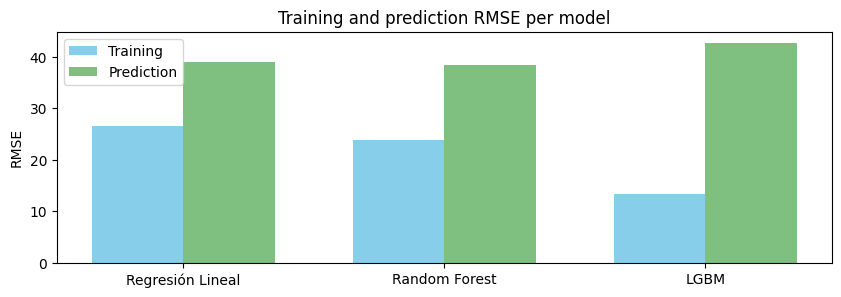

In [36]:
# Data
modelos = ['Regresión Lineal', 'Random Forest', 'LGBM']
rmse_entrenamiento = [rlineal_train_rmse, forest_train_rmse, lgbm_train_rmse]
rmse_prediccion = [rlineal_pred_rmse, forest_pred_rmse, lgbm_pred_rmse]

# Bar width
bar_width = 0.35

# Bar position
posiciones_entrenamiento = range(len(modelos))
posiciones_prediccion = [p + bar_width for p in posiciones_entrenamiento]

# Graph
plt.figure(figsize=(10, 3))
plt.bar(posiciones_entrenamiento, rmse_entrenamiento, width=bar_width, color='skyblue', label='Training')
plt.bar(posiciones_prediccion, rmse_prediccion, width=bar_width, color='green', alpha=0.5, label='Prediction')

# Print
plt.title('Training and prediction RMSE per model')
plt.ylabel('RMSE')
plt.xticks([p + bar_width / 2 for p in posiciones_entrenamiento], modelos)
plt.legend()
plt.show()

<div style="color: #196CC4;">
<b>Training Precision - RMSE (Root Mean Squared Error):</b><br>
▶ The LGBM model has the lowest RMSE on the training set, indicating a better fit to the training data. Therefore, the LGBM model is better able to capture complex relationships between input features and the target variable during training.<br>
<b>Prediction Precision - RMSE (Root Mean Squared Error):</b><br>
▶ Linear Regression has a lower prediction RMSE than the other models, indicating better performance on new data. On the other hand, LGBM remains competitive.
</div>

### Performance analysis

<div style="color: #196CC4;">
<b>Training Time:</b><br>
▶ Linear regression has a significantly lower training time compared to the other models; this means it is faster to train.<br>
   
<b>Prediction Speed:</b><br>
▶ Linear regression has the lowest prediction time, making it ideal for applications where a quick response is needed.
</div>

-----

## Conclusions

### Final Model Selection

<div style="color: #196CC4;">
Random Forest is the model that offers the best balance between accuracy and prediction time. Although it has a longer prediction time than Linear Regression, its lower RMSE indicates that it makes more accurate predictions. Accuracy in prediction is critical in most cases, and the difference in prediction time is relatively small compared to the improvement in accuracy it provides.
</div>


In [37]:
# Parameters
best_params_forest = {
    'max_depth': 5,
    'max_features': 1.0,
    'min_samples_leaf': 3,
    'min_samples_split': 2,
    'n_estimators': 50,
    'random_state': 12345
}

# Initialize Model
final_forest_model = RandomForestRegressor(**best_params_forest)

# Train with combined sets
features_combined_train = pd.concat([features_train, features_valid])
target_combined_train = pd.concat([target_train, target_valid])

forest_start_train_time = time.time()
final_forest_model.fit(features_combined_train, target_combined_train)

# Training time
forest_end_train_time = time.time()
forest_train_time = forest_end_train_time - forest_start_train_time

# Test predictions
forest_start_pred_time = time.time()
predicted_test_forest_final = final_forest_model.predict(features_test)

# Predictions time
forest_end_pred_time = time.time()
forest_pred_time = forest_end_pred_time - forest_start_pred_time

In [38]:
# Metrics
forest_test_mse = mean_squared_error(target_test, predicted_test_forest_final)
forest_test_rmse = forest_test_mse ** 0.5

# Print
print("Final Random Forest Model - Trained with the combined training and validation set")
print()
print("Root Mean Squared Error (RMSE) on the test set:", forest_test_rmse)
print("Prediction time:", forest_pred_time, "seconds")

Final Random Forest Model - Trained with the combined training and validation set

Root Mean Squared Error (RMSE) on the test set: 30.698909298336
Prediction time: 0.004912137985229492 seconds


### Conclusions

<div style="color: #196CC4;">
The final Random Forest model, trained with the combined training and validation set, shows a significant improvement in RMSE compared to the previously evaluated models. The RMSE of the final model is the lowest among all the compared models, indicating better accuracy in predicting the number of orders in the test set.
</div>
